<a href="https://colab.research.google.com/github/namratabiswas/Linear-Regression/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
#matplotlib.rcParams.update({'font.size': 12})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso


import cv2

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()




In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
housing_df=pd.DataFrame(housing.data,columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


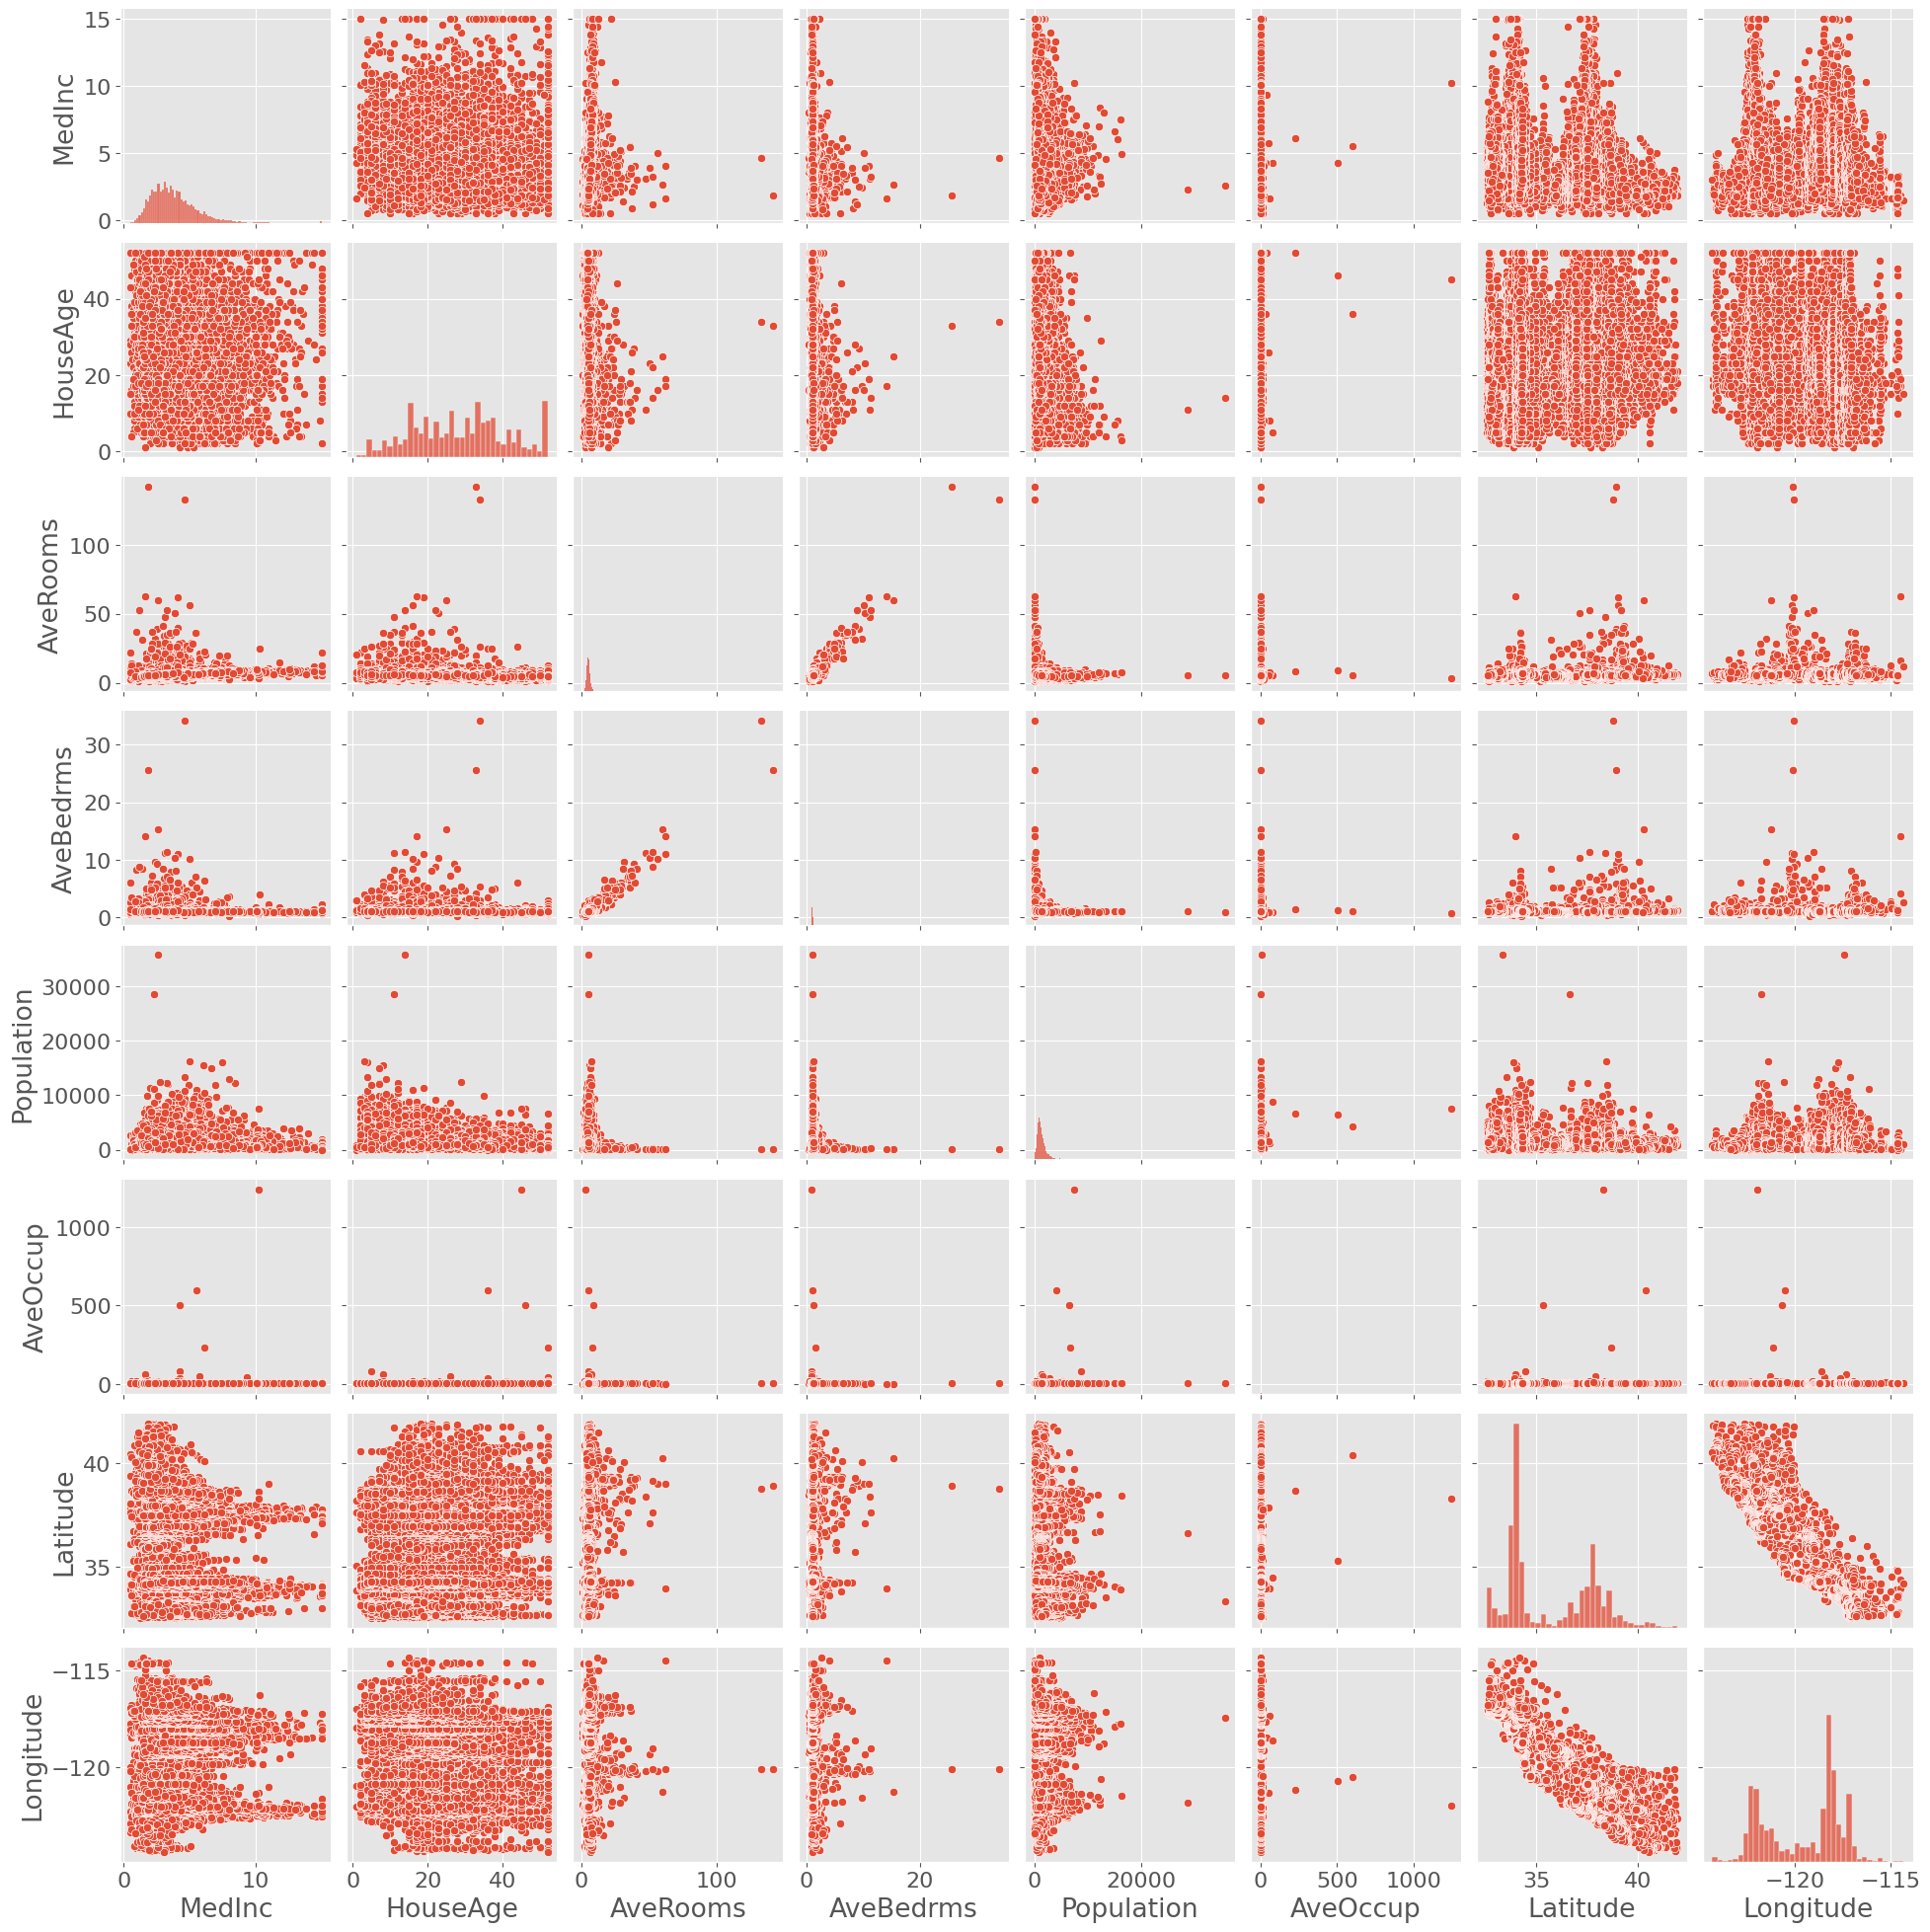

In [8]:
import seaborn as sns
sns.pairplot(housing_df)

We will add the target to the dataframe

In [11]:
housing_df['Price'] = housing.target
housing_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [12]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Now we assign the Features(x) into one variable and the target(price) in another

In [15]:
Features = housing_df.drop('Price', axis=1)
Features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
Target= housing_df['Price']
Target.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


We will usr Linear Regression and split the data into 70%(training) and 30%(testing)



In [21]:
X_train,X_test,y_train,y_test=train_test_split(Features,Target,test_size=0.3)
print(len(X_test), len(y_test))
print(len(X_train),len(y_train))

6192 6192
14448 14448


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
lr.coef_

array([ 4.31279459e-01,  9.11090476e-03, -1.03865656e-01,  6.05791489e-01,
       -8.58889138e-07, -3.83046489e-03, -4.25757627e-01, -4.36302360e-01])

In [24]:
lr.intercept_

-36.94762784484498

Coefficients: Represent the strength and direction of the relationship between each independent variable (feature) and the dependent variable (target).

A positive coefficient indicates a direct relationship: as the feature increases, the target increases.
A negative coefficient indicates an inverse relationship: as the feature increases, the target decreases.

Intercept: Represents the predicted value of the target when all independent variables are zero. It's essentially the baseline level of the dependent variable when the predictors are absent.

Checking coefficients helps determine which variables are statistically significant.
Statistical tests (like t-tests) can assess whether the coefficients are significantly different from zero, providing evidence that a variable is relevant.

Large coefficients indicate features with a strong influence, helping in feature selection or engineering.

An unusually high intercept or coefficients can signal potential issues, such as multicollinearity, outliers, or improper scaling of variables.

In [25]:
Train_score = lr.score(X_train,y_train)
Train_score

0.6051679014331501

. Train Score
Definition: The performance of the model on the training dataset.
Purpose: Measures how well the model has learned from the training data.
Interpretation:
A high train score indicates that the model fits the training data well.
However, an overly high train score (e.g., 1.0 or close to it) might indicate overfitting, where the model memorizes the training data instead of generalizing patterns.

In [26]:
Test_Score = lr.score(X_test,y_test)
Test_Score

0.6080923531875719

Test Score
Definition: The performance of the model on unseen testing data.
Purpose: Measures the generalization ability of the model.
Interpretation:
A high test score indicates that the model generalizes well to new data.
A significantly lower test score compared to the train score indicates potential overfitting.
A low test score, along with a low train score, suggests underfitting, meaning the model hasn't captured the underlying patterns in the data.

Ridge Regression

Ridge assigns a penalty that is the squared magnitude of the coefficients to the loss function multiplied by lambda.
As Lasso does, ridge also adds a penalty to coefficients the model overemphasizes.
The value of lambda also plays a key role in how much weight you assign to the penalty for the coefficients.
The larger your value of lambda, the more likely your coefficients get closer and closer to zero.
Unlike lasso, the ridge model will not shrink these coefficients to zero.
Ridge Formula: Sum of Error + Sum of the squares of coefficients



What are some limitations of Ridge?
Ridge does not eliminate coefficients in your model even if the variables are irrelevant.
This can be negative if you have more features than observations.

In [31]:
rr = Ridge(alpha=10)   # Lambda
rr.fit(X_train, y_train)

Ridge(alpha=10)

In [32]:
rr.coef_

array([ 4.30011021e-01,  9.13424504e-03, -1.01413074e-01,  5.93115672e-01,
       -7.62927145e-07, -3.82575006e-03, -4.25459357e-01, -4.35816159e-01])

In [33]:
# get importance
importance = rr.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.43001
Feature: 1, Score: 0.00913
Feature: 2, Score: -0.10141
Feature: 3, Score: 0.59312
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00383
Feature: 6, Score: -0.42546
Feature: 7, Score: -0.43582


In [34]:
rr.intercept_

-36.89544417928332

In [45]:
Ridge_train_score = rr.score(X_train,y_train)
print(Ridge_train_score)

0.6051633948636193


In [46]:
Ridge_test_score = rr.score(X_test,y_test)
print(Ridge_test_score)

0.6080187767256007


In [37]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [38]:
rr100.coef_

array([ 4.20744107e-01,  9.33408217e-03, -8.33702749e-02,  4.99317015e-01,
        4.01857616e-08, -3.79492979e-03, -4.21658877e-01, -4.30518872e-01])

In [39]:
rr100.intercept_

-36.363638812154356

In [40]:
Ridge_train_score100 = rr100.score(X_train,y_train)   # Alpha = 100
Ridge_train_score100

0.6048369949906166

In [42]:
Ridge_test_score100 = rr100.score(X_test, y_test)
Ridge_test_score100

0.607214112028859

In [47]:
print("linear regression train score:", Train_score)
print("linear regression test score:", Test_Score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.6051679014331501
linear regression test score: 0.6080923531875719
ridge regression train score low alpha: 0.6051633948636193
ridge regression test score low alpha: 0.6080187767256007
ridge regression train score high alpha: 0.6048369949906166
ridge regression test score high alpha: 0.607214112028859


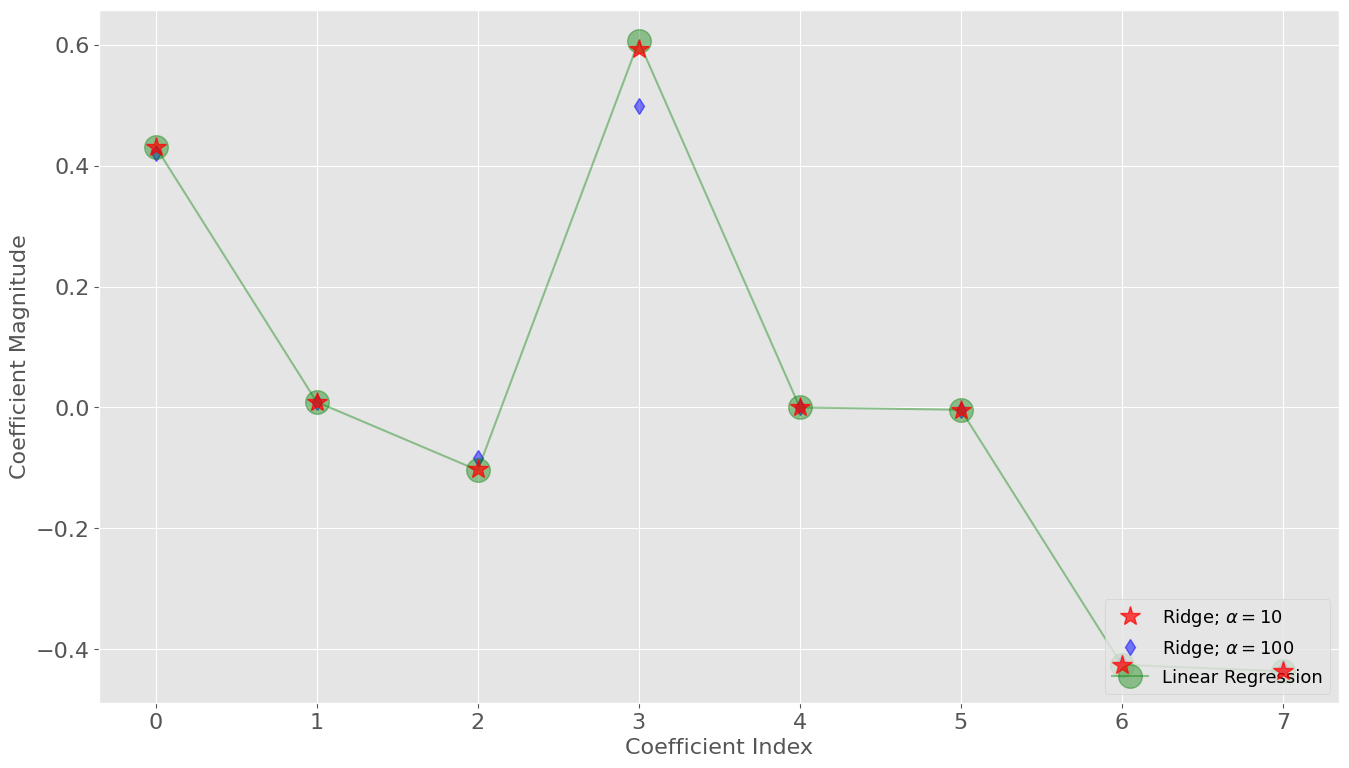

In [50]:
plt.figure(figsize=(16,9))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=15,color='red',
         label=r'Ridge; $\alpha = 10$',zorder=7)
# zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=8,color='blue',
         label=r'Ridge; $\alpha = 100$')
# alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,marker='o',markersize=17,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()